In [365]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [330]:
car_data = pd.read_csv('CarPrice_Assignment.csv')
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### I want CarName to be a part of the feature in my modeling, so i decided to take the model off, to reduce the amount of unique car values that i could work with.

In [331]:
car_data['new_car_name'] = car_data['CarName'].str.split().str[0]
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,new_car_name
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [428]:
car_data['new_car_name'].head(28)

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
Name: new_car_name, dtype: object

### I also wanted to ensure that door number & Cylinder Number column are converted into a numeric value, as it is very important to my modeling feature

In [332]:
car_data['new_door_number'] = pd.DataFrame({'doornumber': ['one', 'two', 'three', 'four', 'five', 'six', 'seven',
                                                      'eight', 'nine', 'ten', 'eleven', 'twelve']})
number_dict = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 
               'ten': 10, 'eleven': 11, 'twelve': 12}
car_data['doornumber'] = car_data['doornumber'].replace(number_dict)
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,new_car_name,new_door_number
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,one
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,two
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,three
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,four
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,five
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,NaN
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,NaN
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,NaN
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,NaN


In [421]:
car_data['new_cylinder_number'] = pd.DataFrame({'cylindernumber': ['one', 'two', 'three', 'four', 'five', 'six', 'seven',
                                                      'eight', 'nine', 'ten', 'eleven', 'twelve']})
number_dict = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 
               'ten': 10, 'eleven': 11, 'twelve': 12}
car_data['cylindernumber'] = car_data['cylindernumber'].replace(number_dict)
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,new_car_name,new_door_number,new_cylinder_number
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,one,one
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,two,two
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,three,three
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,audi,four,four
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,audi,five,five
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,3.15,9.5,114,5400,23,28,16845.0,volvo,NaN,NaN
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,3.15,8.7,160,5300,19,25,19045.0,volvo,NaN,NaN
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,2.87,8.8,134,5500,18,23,21485.0,volvo,NaN,NaN
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,3.40,23.0,106,4800,26,27,22470.0,volvo,NaN,NaN


In [422]:
car_data.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [423]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'new_car_name', 'new_door_number', 'new_cylinder_number'],
      dtype='object')

In [336]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               205 non-null    int64  
 1   symboling            205 non-null    int64  
 2   CarName              205 non-null    object 
 3   fueltype             205 non-null    object 
 4   aspiration           205 non-null    object 
 5   doornumber           205 non-null    int64  
 6   carbody              205 non-null    object 
 7   drivewheel           205 non-null    object 
 8   enginelocation       205 non-null    object 
 9   wheelbase            205 non-null    float64
 10  carlength            205 non-null    float64
 11  carwidth             205 non-null    float64
 12  carheight            205 non-null    float64
 13  curbweight           205 non-null    int64  
 14  enginetype           205 non-null    object 
 15  cylindernumber       205 non-null    int

In [337]:
car_data.duplicated().sum()

0

In [425]:
car_data.isnull().sum()

car_ID                   0
symboling                0
CarName                  0
fueltype                 0
aspiration               0
doornumber               0
carbody                  0
drivewheel               0
enginelocation           0
wheelbase                0
carlength                0
carwidth                 0
carheight                0
curbweight               0
enginetype               0
cylindernumber           0
enginesize               0
fuelsystem               0
boreratio                0
stroke                   0
compressionratio         0
horsepower               0
peakrpm                  0
citympg                  0
highwaympg               0
price                    0
new_car_name             0
new_door_number        193
new_cylinder_number    193
dtype: int64

In [426]:
# This is much better to work with since i now have 28 unique different new_car_name to work with. 
car_data.nunique()

car_ID                 205
symboling                6
CarName                147
fueltype                 2
aspiration               2
doornumber               2
carbody                  5
drivewheel               3
enginelocation           2
wheelbase               53
carlength               75
carwidth                44
carheight               49
curbweight             171
enginetype               7
cylindernumber           7
enginesize              44
fuelsystem               8
boreratio               38
stroke                  37
compressionratio        32
horsepower              59
peakrpm                 23
citympg                 29
highwaympg              30
price                  189
new_car_name            28
new_door_number         12
new_cylinder_number     12
dtype: int64

## The data looks clean.
### Now, I'll begin modeling 

In [429]:
# Now I'll select the target variable
y = car_data.price

In [430]:
# Here, i'll pick the feature variables. These are the variables that i want my price prediction to be based on
feature_names = ['curbweight', 'horsepower', 'enginesize', 'carlength', 'carwidth', 'carheight', 'peakrpm', 
                 'doornumber', 'cylindernumber', 'wheelbase']

In [431]:
X = car_data[feature_names]

In [432]:
X.describe()

,curbweight,horsepower,enginesize,carlength,carwidth,carheight,peakrpm,doornumber,cylindernumber,wheelbase
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,2555.565854,104.117073,126.907317,174.049268,65.907805,53.724878,5125.121951,3.121951,4.380488,98.756585
std,520.680204,39.544167,41.642693,12.337289,2.145204,2.443522,476.985643,0.994966,1.080854,6.021776
min,1488.000000,48.000000,61.000000,141.100000,60.300000,47.800000,4150.000000,2.000000,2.000000,86.600000
25%,2145.000000,70.000000,97.000000,166.300000,64.100000,52.000000,4800.000000,2.000000,4.000000,94.500000
50%,2414.000000,95.000000,120.000000,173.200000,65.500000,54.100000,5200.000000,4.000000,4.000000,97.000000
75%,2935.000000,116.000000,141.000000,183.100000,66.900000,55.500000,5500.000000,4.000000,4.000000,102.400000
max,4066.000000,288.000000,326.000000,208.100000,72.300000,59.800000,6600.000000,4.000000,12.000000,120.900000


## Decision Tree Algorithm

## I will start with a Decision Tree model, Fine tune it. Then i will also test my data on a Random Forest model for comparison

In [433]:
# 1st MODEL
# Decision Tree Regressor Model (I Will predict pricing with trained dataset)
car_data_model = DecisionTreeRegressor(random_state=0)
car_data_model.fit(X,y)
prediction = car_data_model.predict(X)
prediction

array([14997.5  , 14997.5  , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        5151.   ,  7605.75 ,  6575.   ,  5974.5  ,  5974.5  ,  7957.   ,
        6229.   ,  7150.5  ,  7150.5  ,  8558.   ,  8921.   , 12964.   ,
        6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
        7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
       10345.   ,  6785.   ,  7605.75 ,  8916.5  , 11048.   , 33900.   ,
       33900.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
        7395.   , 11395.   , 11395.   , 13645.   , 15645.   ,  9720.   ,
        9370.   ,  9720.   ,  9370.   , 10795.   , 11245.   , 18280.   ,
       18344.   , 25552.   , 28248.   , 28176.   , 31600.   , 34184.   ,
       35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,  6189.   ,
        6669.   ,  7689.   ,  9959.   ,  8499.   , 

In [435]:
#First i will calculate the Mean Absolute Error for the trained data, which would give us the In-Sample Score
# As you can see, the Mean car price was approximately 13,277. So our in-sample score was only off by  
# Approximately 86.
in_mae = mean_absolute_error(y, prediction)
in_mae

85.84634146341463

### Here i would be conducting another Model Validation using a Trained and Untrained dataset. First i would split the dataset into a train and test sets. Then calculate the Mean Absolute Error

In [436]:
#Since MAE is calculated Actual - Predicted Price, it makes sense that we split the dataset to train and test splits. 
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [437]:
train_X.head(5)

,curbweight,horsepower,enginesize,carlength,carwidth,carheight,peakrpm,doornumber,cylindernumber,wheelbase
14,3055,121,164,189.0,66.9,55.7,4250,4,6,103.5
162,2140,70,98,166.3,64.4,52.8,4800,4,4,95.7
59,2385,84,122,177.8,66.5,53.7,4800,2,4,98.8
19,1874,70,90,155.9,63.6,52.0,5400,2,4,94.5
177,2458,92,122,175.6,66.5,53.9,4200,4,4,102.4


In [438]:
# 2nd MODEL
# Here, i predicted prices using the test dataset.
train_test_model = DecisionTreeRegressor(random_state=0)
train_test_model.fit(train_X, train_y)
val_predict = train_test_model.predict(val_X)
val_predict

array([ 6189.   ,  7349.   ,  5348.   ,  6295.   ,  8845.   , 31600.   ,
        7299.   ,  6479.   ,  7150.5  ,  8495.   , 15510.   , 11549.   ,
       13415.   ,  7895.   , 12764.   , 11549.   ,  7957.   ,  7299.   ,
       18620.   ,  9233.   ,  9720.   ,  6295.   , 13950.   ,  7957.   ,
       11549.   ,  7299.   , 14869.   ,  7775.   ,  6229.   ,  7295.   ,
        8238.   ,  8921.   , 30760.   , 11850.   , 16900.   ,  8238.   ,
        7957.   , 35550.   , 13645.   , 16845.   ,  7299.   , 17859.167,
        5399.   ,  9639.   ,  8495.   ,  7299.   , 45400.   ,  6795.   ,
       18280.   , 14399.   , 31600.   , 16630.   ])

In [439]:
# Mean absolute error for Validation dataset.
# Here you can see that when we used an untrained dataset to predict car prices, MAE is much higher. So if this model
# was to go in production, it will be less efficient in predicting prices for untrained dataset. 
val_mae = mean_absolute_error(val_y, val_predict)
val_mae

1699.112173076923

### In order to make sure that my model is not Over fitting or Under-fitting i will create a model that ensures this doesn't happen using max_leaf_nodes 

In [355]:
#First i would create a function that calculates Mean Absolute Error.
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    predict_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, predict_val)
    return(mae)

In [372]:
#Now i will compare different Tree sizes in order to fine tune my model.
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
#Then i will loop through this. 
for leaf in candidate_max_leaf_nodes:
    leaf = get_mae(leaf, train_X, val_X, train_y, val_y)
    print(leaf)

2294.5873436907923
1745.0289131445477
1558.5764777402087
1637.5119047619046
1633.6826923076924
1633.6826923076924


### Here we are able to say that the 50th leaf has the better price prediction for the untrained dataset due to its lowest Mean Absolute Error values compared to other leaves

### Validation Curve is at 50 node

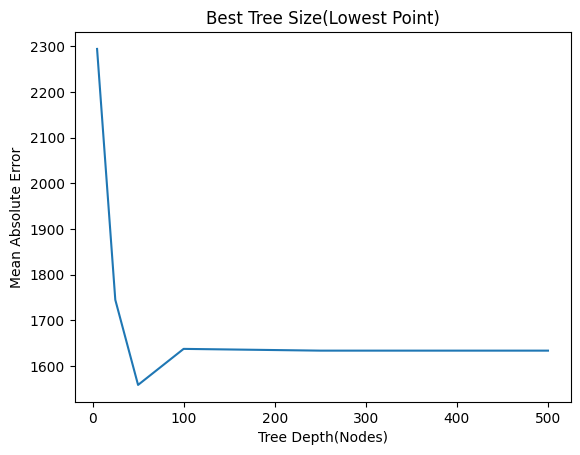

In [388]:
y_axis = [2294.5873436907923,1745.0289131445477,1558.5764777402087,1637.5119047619046,1633.6826923076924,
        1633.6826923076924]
x_axis = candidate_max_leaf_nodes
plt.plot(x_axis, y_axis)
plt.title('Best Tree Size(Lowest Point)')
plt.xlabel('Tree Depth(Nodes)')
plt.ylabel('Mean Absolute Error')
plt.show()

In [379]:
##Best Tree size has 50 nodes
best_tree_size = 50

### Now that i know the best best tree size to predict the car prices, i will use it to predict the prices of the whole dataset (Trained dataset) like we did at the beginning of the modeling ( Line #346)

In [381]:
# 3rd MODEL
final_model = DecisionTreeRegressor(max_leaf_nodes= best_tree_size, random_state =0)
final_model.fit(X,y)
pre_dict = final_model.predict(X)
pre_dict

array([15837.5       , 15837.5       , 15980.        , 14600.        ,
       17821.        , 14600.        , 18130.        , 18130.        ,
       22990.        , 18262.29175   , 15837.5       , 15837.5       ,
       21364.33333333, 21364.33333333, 24565.        , 31080.25      ,
       41315.        , 36440.        ,  5837.54545455,  7269.27272727,
        7269.27272727,  5837.54545455,  5837.54545455,  8553.625     ,
        6623.58333333,  6623.58333333,  6623.58333333,  8553.625     ,
        9288.4       , 12785.66666667,  5837.54545455,  7269.27272727,
        5837.54545455,  7269.27272727,  7269.27272727,  7269.27272727,
        7269.27272727,  8553.625     ,  8553.625     ,  9288.4       ,
        9288.4       , 12026.14285714,  9620.375     ,  7615.5       ,
        7269.27272727,  7269.27272727,  9913.        , 34260.        ,
       34260.        , 36440.        ,  5837.54545455,  5837.54545455,
        5837.54545455,  6623.58333333,  6623.58333333, 12026.14285714,
      

### Here we can see that the MAE is higher than the first model we created which was Over-fitted and the second model which was Under-fitted. This makes this a more improved model.

In [384]:
#Now i want to calculate the MAE for the final model since it has been fine tuned. 
final_mae = mean_absolute_error(y, pre_dict)
final_mae

526.9472119733924

### Now i would create a Random Forest Model to compare to the Decision Tree. My goal here would be to determine the best model for this exercise

## Random Forest Algorithm

In [440]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X, y)
rf_predict = rf_model.predict(X)
rf_predict

array([14235.07666667, 14235.07666667, 15913.74      , 12644.145     ,
       16771.63      , 13917.39      , 18239.89      , 18971.79      ,
       22508.82167   , 17961.89022   , 16013.17      , 16209.66      ,
       20066.78666667, 20526.39      , 22431.24      , 33667.28      ,
       38882.43      , 36272.92      ,  5505.06      ,  7506.44983333,
        7160.28991667,  5922.11416667,  5922.11416667,  7925.93      ,
        6362.51916667,  7087.9325    ,  7087.9325    ,  8267.06      ,
        9367.43      , 13167.39      ,  6184.70333333,  6830.50666667,
        5649.20833333,  6653.51333333,  6990.07333333,  7267.52      ,
        7402.485     ,  8258.56      ,  8804.73      ,  9136.95      ,
       10433.07      , 12828.59      ,  9942.35      ,  7400.76      ,
        7506.44983333,  8349.92091667, 11472.97      , 34902.76142857,
       34902.76142857, 37723.355     ,  5648.17166667,  6188.32833333,
        6454.32833333,  6817.785     ,  7018.        , 11695.5       ,
      

In [441]:
fr_mae = mean_absolute_error(y, rf_predict)
fr_mae

550.128580773519

In [442]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(train_X,train_y)
rf_predict = rf_model.predict(val_X)
rf_predict

array([ 6581.27416667,  7284.082     ,  6576.29033333,  6443.82166667,
        8887.18      , 30212.845     ,  7199.77      ,  5968.65166667,
        7172.8945    ,  9084.245     , 15071.14334   , 13407.55      ,
       14198.63      ,  8212.26      , 13232.77      , 12727.75083333,
        9085.52      ,  6690.2475    , 17514.39503   , 10111.55666667,
       10728.425     ,  6293.01916667, 14242.45      ,  8154.225     ,
       11909.7925    ,  6898.6725    , 14379.14      ,  8452.2       ,
        6480.82383333,  7340.722     ,  8078.37      ,  9563.015     ,
       34335.89      , 12718.61666667, 16154.23      ,  8317.55333333,
        8131.13      , 35771.72      , 13037.5647619 , 17642.11      ,
        7030.37366667, 17645.33669   ,  6895.42333333,  9923.28      ,
        8132.34      ,  7204.89      , 38642.685     ,  6351.695     ,
       20212.17501   , 14637.19      , 30105.905     , 16315.85      ])

In [443]:
# MAE
# Random forest model has a lower MAE when tested on the trained and test datasets.
rf_mae = mean_absolute_error(val_y, rf_predict)
rf_mae

1478.3079331043955

In [444]:
#Splitting dataset
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size = 0.8, test_size=0.2, random_state=0)

In [445]:
# Writing different models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=300, random_state=0)
model_6 = RandomForestRegressor(n_estimators=400, random_state=0)
model_7 = RandomForestRegressor(n_estimators=500, random_state=0)
model_8 = RandomForestRegressor(n_estimators=600, random_state=0)
model_9 = RandomForestRegressor(n_estimators=700, random_state=0)
models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8, model_9]

In [446]:
#Defining a function for MAE
def score_model(model, x_t=X_train, x_v=X_val, y_t=y_train, y_v=y_val):
    model.fit(x_t, y_t)
    preds = model.predict(x_v)
    return mean_absolute_error(y_v, preds)

In [447]:
for i in range(0, len(models)):
    mae = score_model(models[i])
    print(mae)

1995.1473573983744
1981.0445330894302
1958.7221556097559
2102.280036598191
1946.0563495857527
1959.7838468902444
1953.6968597886178
1964.5726903445604
1959.031098262817


### Validation Curve is at 300 Node

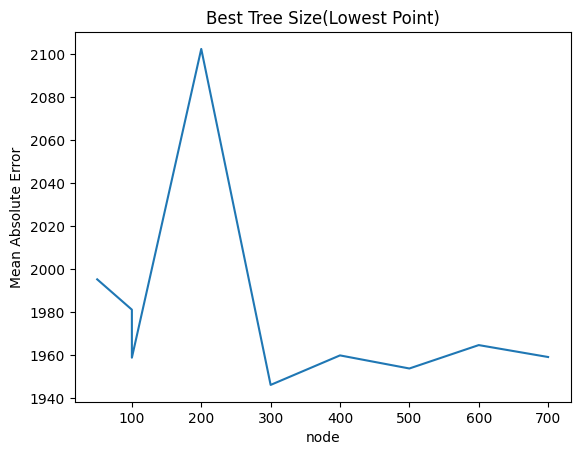

In [420]:
y_axis = [1995.1473573983744,
1981.0445330894302,
1958.7221556097559,
2102.280036598191,
1946.0563495857527,
1959.7838468902444,
1953.6968597886178,
1964.5726903445604, 1959.031098262817]
x_axis = [50, 100, 100, 200 ,300, 400,500, 600, 700]
plt.plot(x_axis, y_axis)
plt.title('Best Tree Size(Lowest Point)')
plt.xlabel('node')
plt.ylabel('Mean Absolute Error')
plt.show()

### Conclusion : I belive that the Decision Tree algorithm is more accurate in predicting prices in this scenario if we are to use untrained dataset. 
#### - When we used Trained datasets to predict prices and checked the MAE, Decision Tree has a lower MAE
#### - When we used Untrained dataset to predict prices, Random Forest has the lower MAE
#### - When we fine tuned and built multiple models using both algorithms, Decision Tree has the lowest number of MAE.

### - This leads me to believe that Decision Tree Algorithm is more accurate in predicting prices in this scenario on a score of 2:1. 